In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [28]:
df = pd.read_csv("Li_1153717_tableS1 - Sheet1.csv")
df = df.fillna(0)
df = df.drop(columns = ['PopID', 'RegionID'])

In [29]:
x = df.select_dtypes(exclude = 'object').values[:, :-1]
y = df.values[:, -1]
x = StandardScaler().fit_transform(x)

In [30]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

In [31]:
finalDf = pd.concat([principalDf, df[['Region']]], axis = 1)

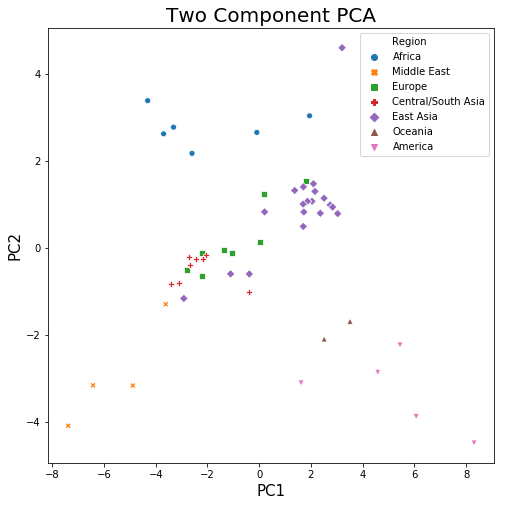

In [32]:
fig = plt.figure(figsize = (8, 8))
ax  = fig.add_subplot(1, 1, 1)
ax.set_xlabel("Principal Component 1", fontsize = 15)
ax.set_ylabel("Principal Component 2", fontsize = 15)
ax.set_title("Two Component PCA", fontsize = 20)

sns.scatterplot(x = 'PC1', y = 'PC2', hue = finalDf.Region, style = finalDf.Region, data = finalDf)

In [33]:
pca.explained_variance_ratio_

array([0.37473487, 0.14135727])